In [1]:
import fastf1
import pandas as pd
from scipy import signal
import numpy as np

In [2]:
fastf1.Cache.enable_cache('fastf1_cache/')
session = fastf1.get_session(2023, "Azerbaijan Grand Prix", "R")
session.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.3.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/robin/miniconda3/envs/pitwall/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Users/robin/miniconda3/envs/pitwall/lib/python3.11/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df,

In [3]:
lap = session.laps.loc[session.laps.index == 182]

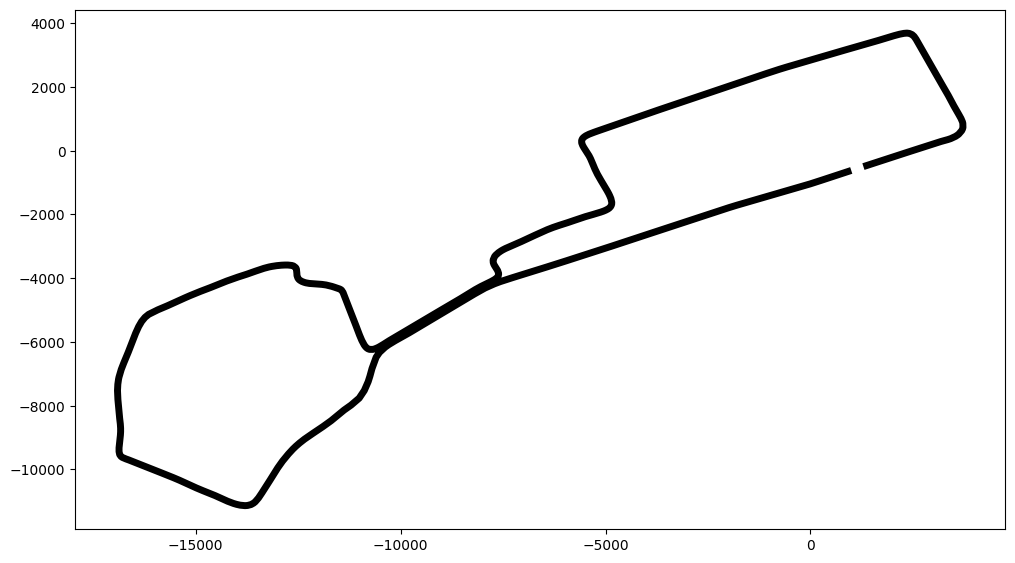

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
data = lap.get_pos_data()
ax.plot(data['X'], data['Y'], color='black', linestyle='-', linewidth=5, zorder=0)
plt.show()

In [5]:
pos_data = lap.get_pos_data()
pos_data = pos_data["X"]
pos_data /= 10

In [6]:
pos_data = pos_data.to_numpy()

In [7]:
def plot(pos_data, window_length, polyorder):
    smooth = signal.savgol_filter(pos_data, window_length=window_length, polyorder=polyorder, mode="wrap")
    smooth = pd.DataFrame(smooth)
    smooth.plot()

<Axes: >

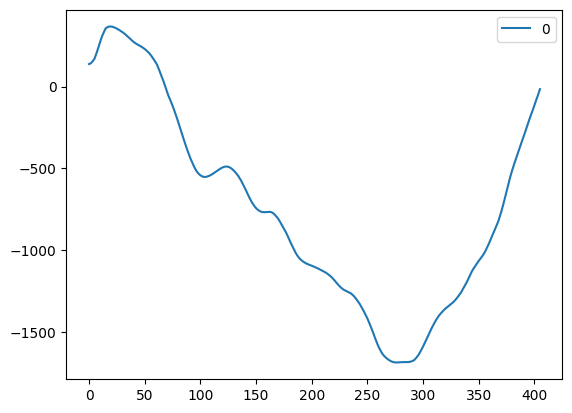

In [8]:
padded_pos_data = np.concatenate(([pos_data[0] for _ in range(9)], pos_data))
naiive_conv = np.convolve(padded_pos_data, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], mode="valid")
naiive_conv = pd.DataFrame(naiive_conv)
naiive_conv.plot()

<Axes: >

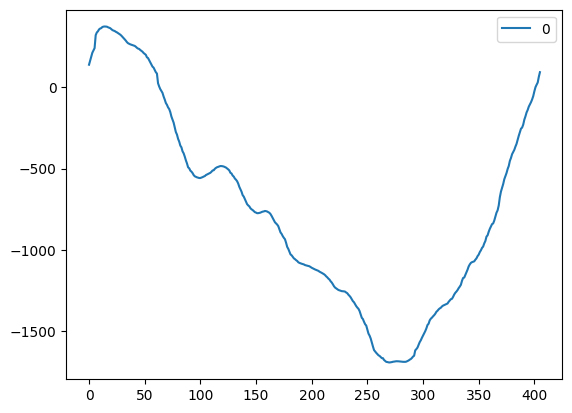

In [9]:
raw = pd.DataFrame(pos_data)
raw.plot()

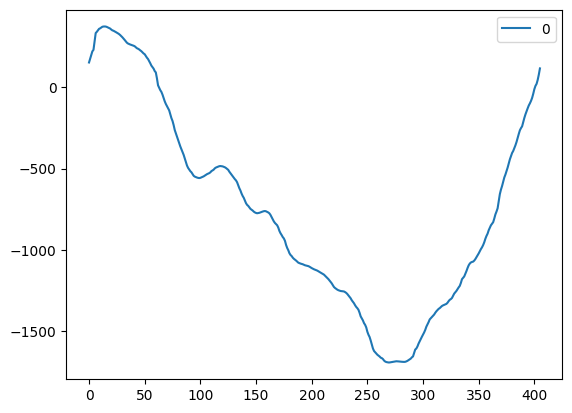

In [20]:
plot(pos_data, window_length=4, polyorder=2)

In [19]:
coeffs = signal.savgol_coeffs(window_length=4, polyorder=2)
coeffs

array([-0.0625,  0.5625,  0.5625, -0.0625])

In [12]:
abc = np.concatenate(([pos_data[0] for _ in range(9)], pos_data,[pos_data[-1] for _ in range(10)]))
xyz = np.convolve(abc, coeffs, mode="valid")
xyz = pd.DataFrame(xyz)
#xyz.plot()

In [13]:
xyz

,0
0,137.300000
1,135.138750
2,133.912500
3,135.924375
4,143.575000
...,...
411,92.086875
412,96.006250
413,94.011250
414,91.500000


In [14]:
smooth = signal.savgol_filter(pos_data, window_length=10, polyorder=2, mode="wrap")
smooth = pd.DataFrame(smooth)
smooth

,0
0,144.524375
1,168.623125
2,194.598750
3,223.655625
4,251.687500
...,...
401,1.060625
402,25.602500
403,52.404375
404,80.622500


In [15]:
pd.DataFrame(pos_data)

,0
0,137.3
1,162.0
2,186.6
3,211.2
4,225.9
...,...
401,-0.7
402,14.4
403,27.7
404,62.8
